In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
%matplotlib inline

In [2]:
df =pd.read_csv('Temp1.csv')

In [3]:
df.head()

,Date,Temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [6]:
df.shape

(3650, 2)

In [8]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [9]:
type(df.Date)

pandas.core.series.Series

In [12]:
df['Date'] = pd.to_datetime(df['Date'],format='mixed')

In [13]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-02-01,17.9
2,1981-03-01,18.8
3,1981-04-01,14.6
4,1981-05-01,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


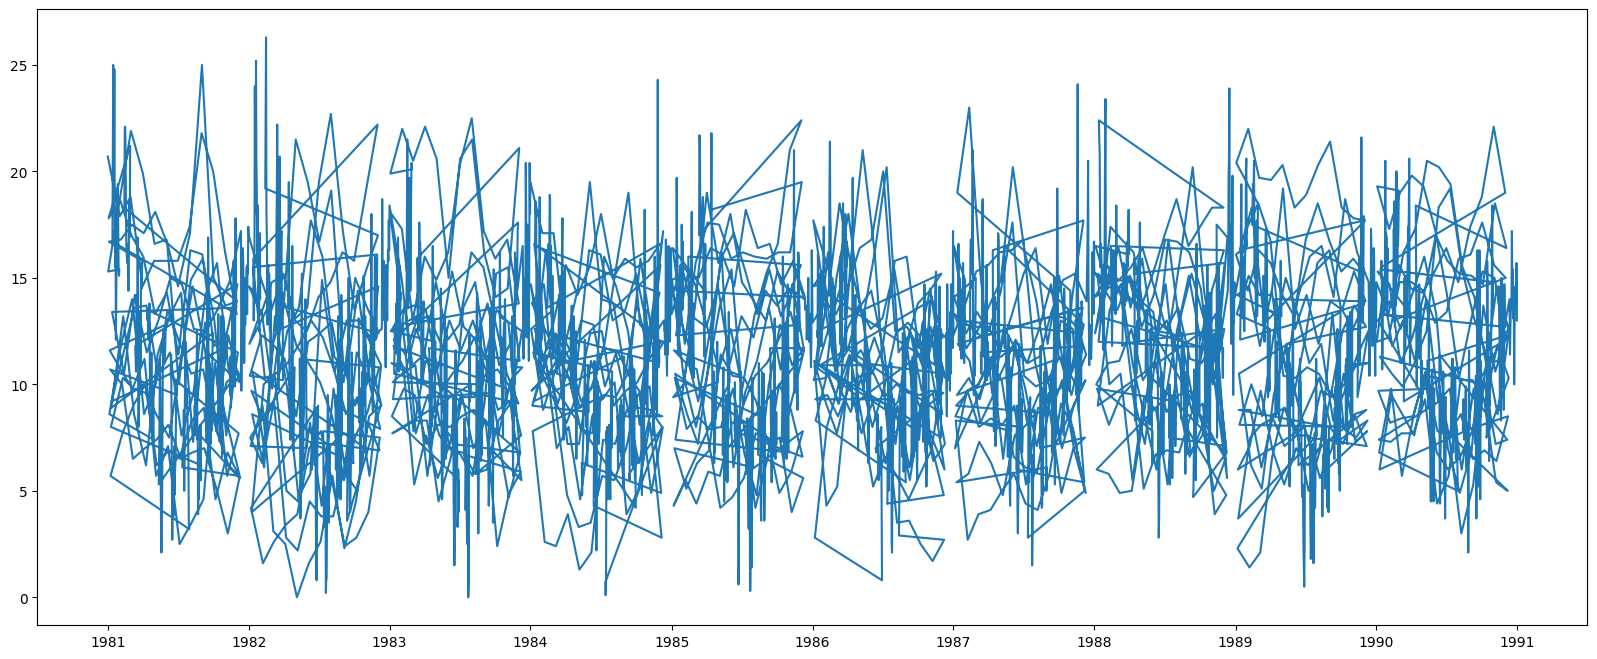

In [14]:
plt.figure(figsize=(20,8))
plt.plot(df['Date'],df['Temp'])

In [15]:
## Create 12 months moving average

df['MA12'] = df['Temp'].rolling(12).mean()

In [17]:
df.head(13)

,Date,Temp,MA12
0,1981-01-01,20.7,NaN
1,1981-02-01,17.9,NaN
2,1981-03-01,18.8,NaN
3,1981-04-01,14.6,NaN
4,1981-05-01,15.8,NaN
5,1981-06-01,15.8,NaN
6,1981-07-01,15.8,NaN
7,1981-08-01,17.4,NaN
8,1981-09-01,21.8,NaN
9,1981-10-01,20.0,NaN


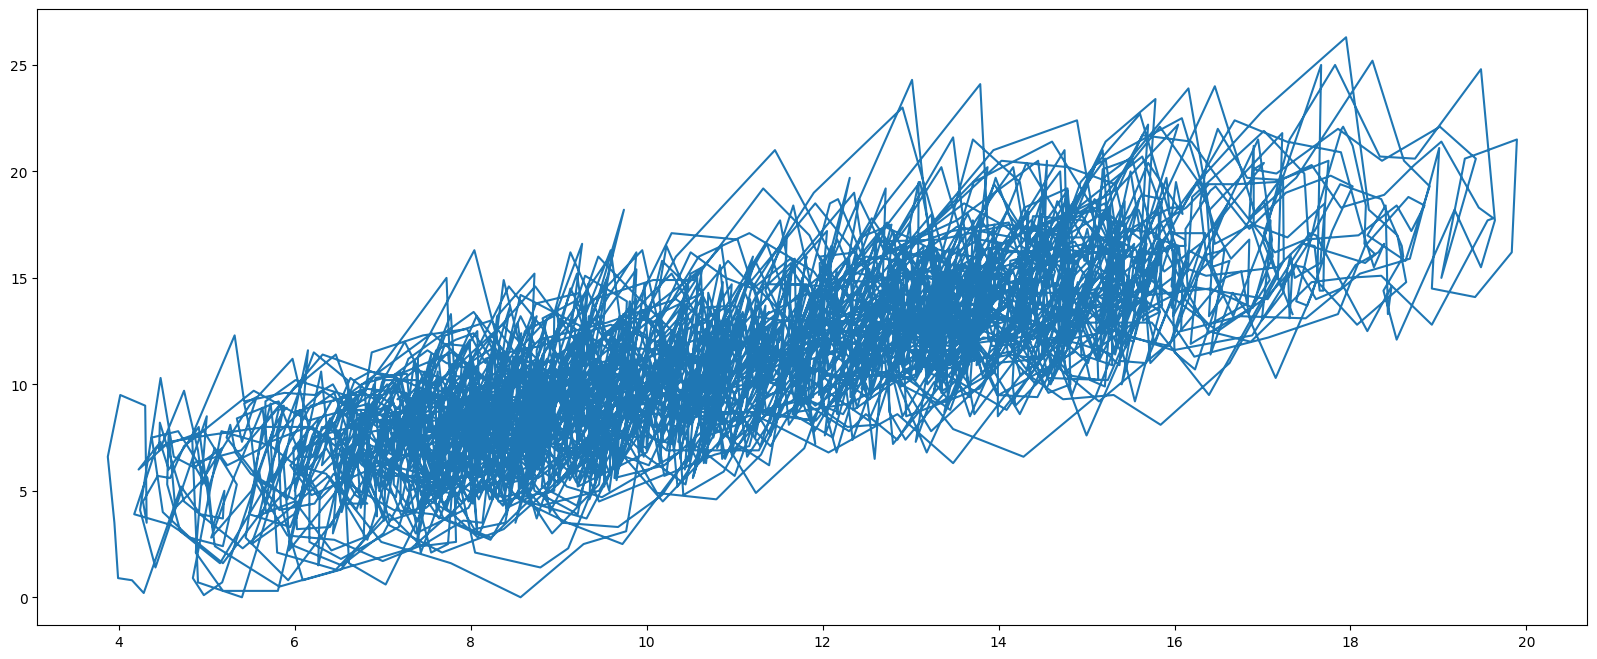

In [18]:
plt.figure(figsize=(20,8))
plt.plot(df['MA12'],df['Temp'])

In [19]:
## Extract month and year from dates 

df['Month'] = [i.month for i in df['Date']]

In [20]:
df

,Date,Temp,MA12,Month
0,1981-01-01,20.7,NaN,1
1,1981-02-01,17.9,NaN,2
2,1981-03-01,18.8,NaN,3
3,1981-04-01,14.6,NaN,4
4,1981-05-01,15.8,NaN,5
...,...,...,...,...
3645,1990-12-27,14.0,13.875000,12
3646,1990-12-28,13.6,13.875000,12
3647,1990-12-29,13.5,13.841667,12
3648,1990-12-30,15.7,13.716667,12


In [21]:
df['Year'] = [i.year for i in df['Date']]

In [22]:
df

,Date,Temp,MA12,Month,Year
0,1981-01-01,20.7,NaN,1,1981
1,1981-02-01,17.9,NaN,2,1981
2,1981-03-01,18.8,NaN,3,1981
3,1981-04-01,14.6,NaN,4,1981
4,1981-05-01,15.8,NaN,5,1981
...,...,...,...,...,...
3645,1990-12-27,14.0,13.875000,12,1990
3646,1990-12-28,13.6,13.875000,12,1990
3647,1990-12-29,13.5,13.841667,12,1990
3648,1990-12-30,15.7,13.716667,12,1990


In [23]:
# create a sequence
df['Series'] = np.arange(1,len(df)+1)

In [24]:
df = df[['Series','Year','Month','Temp']]

In [42]:
df.head()

,Series,Year,Month,Temp
0,1,1981,1,20.7
1,2,1981,2,17.9
2,3,1981,3,18.8
3,4,1981,4,14.6
4,5,1981,5,15.8


In [51]:
df.isnull().sum()

Series    0
Year      0
Month     0
Temp      0
dtype: int64

In [43]:
X = df.drop(['Temp','Series'],axis=1)
Y = df.Temp

In [44]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.25,random_state=0)

In [46]:
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [47]:
y_pred = lr.predict(X_test)

In [48]:
from sklearn.metrics import r2_score,mean_squared_error


In [49]:
r2_score(y_test,y_pred)

0.02342145420256636

In [50]:
mean_squared_error(y_test,y_pred)

17.390113082591945

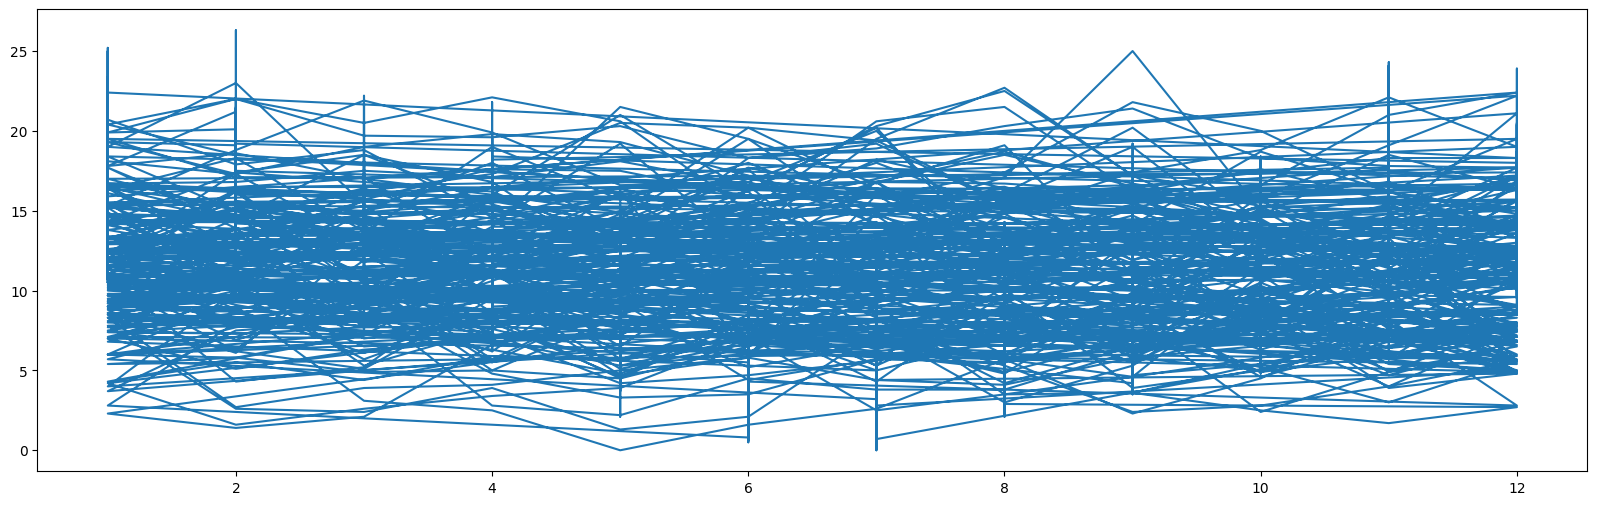

In [39]:
plt.figure(figsize=(20,6))
plt.plot(df['Month'],df['Temp'])

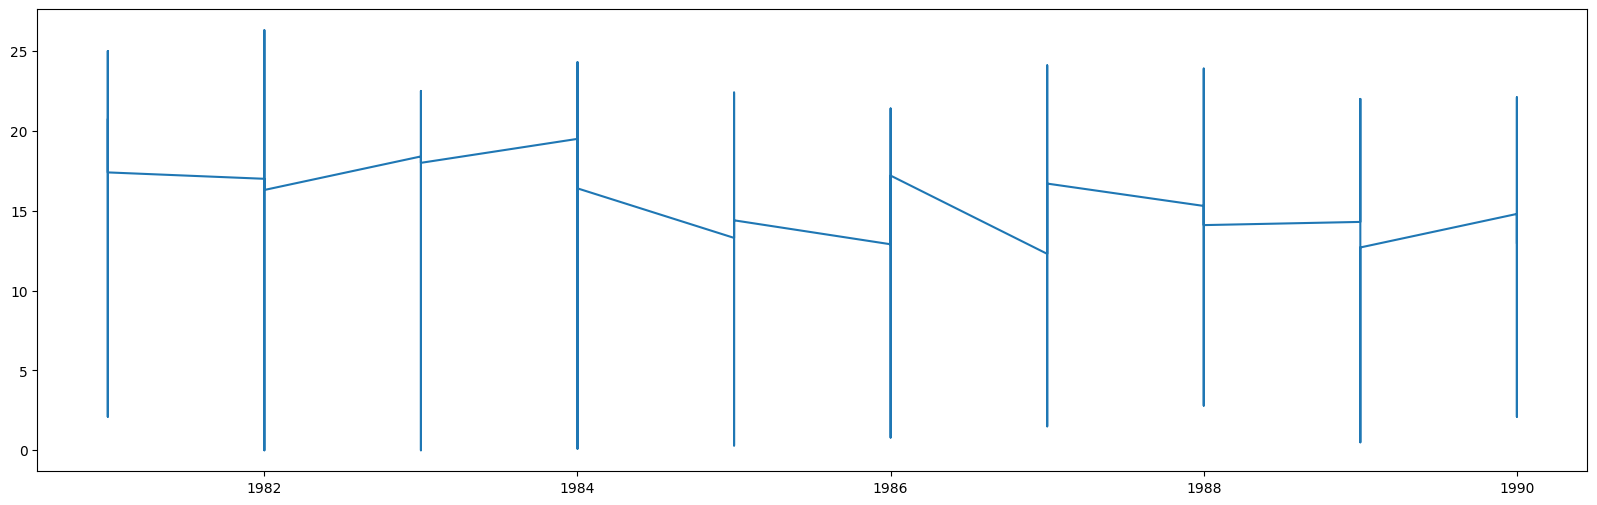

In [40]:
plt.figure(figsize=(20,6))
plt.plot(df['Year'],df['Temp'])